In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('ushape.csv', header=None)
df

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


In [19]:
df.columns = ['X', 'Y', 'class']
df

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


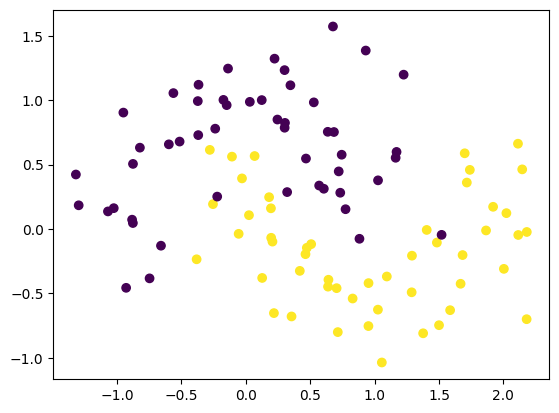

In [20]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [22]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values
X

array([[ 0.03159499,  0.98698776],
       [ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149],
       [ 2.11285708,  0.66208353],
       [ 0.5696927 ,  0.33744136],
       [ 0.95217454, -0.75307471],
       [-0.02922115,  0.39287336],
       [ 1.71579557,  0.36069454],
       [-0.27883014,  0.61420539],
       [ 2.00344509, -0.3091496 ],
       [ 1.50009616, -0.74636376],
       [ 1.22540835,  1.19793017],
       [ 0.46730819,  0.54703192],
       [-0.36653222,  1.11971633],
       [ 0.30124459,  1.23315697],
       [ 0.30430746,  0.82373935],
       [-0.23712492,  0.77876034],
       [ 1.16339832,  0.55290238],
       [-0.59702417,  0.6572361 ],
       [ 0.46356735, -0.1951543 ],
       [ 0.68451111,  0.75287685],
       [ 0.70515699, -0.45892444],
       [-0.65805008, -0.12944211],
       [-0.74662946, -0.3829632 ],
       [ 0.60585226,  0.31252842],
       [ 2.18137168, -0.02291747],
       [ 1.91980633,

In [24]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [26]:
model = Sequential()

model.add(Dense(10, activation='sigmoid', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

D:\Artificial Intelligence\Deep-Learning\ANN-Handwrittn-Digit-Classification\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Set parameters to 0
model.get_weights()

[array([[ 0.0104568 , -0.2205536 , -0.04919463,  0.23755956, -0.67283344,
         -0.68350756, -0.70487535,  0.6033817 ,  0.13249856, -0.06794441],
        [-0.27406746,  0.11827099, -0.6823067 , -0.22227758,  0.11870962,
         -0.30362454,  0.3679344 , -0.3050992 , -0.19143236,  0.4840024 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.11978185],
        [ 0.41845232],
        [ 0.05589813],
        [ 0.15538162],
        [ 0.53593355],
        [ 0.592184  ],
        [ 0.4995951 ],
        [ 0.3652826 ],
        [ 0.32427567],
        [ 0.47549266]], dtype=float32),
 array([0.], dtype=float32)]

In [28]:
initial_weights = model.get_weights()

In [29]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [33]:
model.set_weights(initial_weights)
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [35]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.5000 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5000 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss:

In [38]:
model.get_weights()

[array([[ 0.4222795 ,  0.4222795 ,  0.4222795 ,  0.4222795 ,  0.4222795 ,
          0.4222795 ,  0.4222795 ,  0.4222795 ,  0.4222795 ,  0.4222795 ],
        [-0.45789158, -0.45789158, -0.45789158, -0.45789158, -0.45789158,
         -0.45789158, -0.45789158, -0.45789158, -0.45789158, -0.45789158]],
       dtype=float32),
 array([-0.1227823, -0.1227823, -0.1227823, -0.1227823, -0.1227823,
        -0.1227823, -0.1227823, -0.1227823, -0.1227823, -0.1227823],
       dtype=float32),
 array([[0.04582411],
        [0.04582411],
        [0.04582411],
        [0.04582411],
        [0.04582411],
        [0.04582411],
        [0.04582411],
        [0.04582411],
        [0.04582411],
        [0.04582411]], dtype=float32),
 array([-0.05042832], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 417us/step


<Axes: >

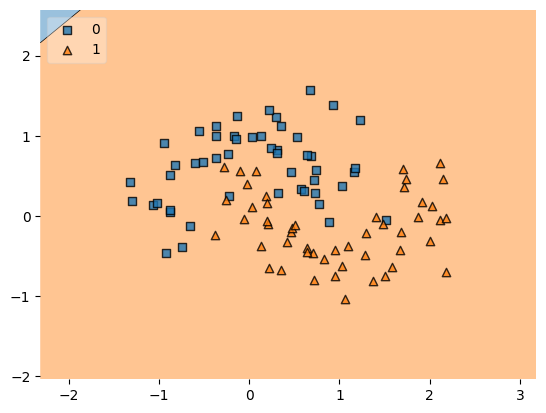

In [39]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)